In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset from the file
file_path = "/content/sales_data.csv"
df = pd.read_csv("/content/sales_data.csv")

# Display first few rows of the dataset to check how its look like
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


For starting  we imported  necessary  Python libraries for data handling and visualisation which I though will be usefull in the beginning and if needed I'll be adding new, where ever in visuallization it will be needed

    pandas is used to load and manipulate the dataset.

    matplotlib.pyplot and seaborn are used for creating visualisations.

Firstky I load the dataset named "Sales_data.csv" and display the first few rows using df.head(). This allows us to take a quick look at the structure of the data, the column names, and some initial values. It helps in understanding what kind of variables we are dealing with (e.g., product_id, sales_date, regions, quantity_sold, etc.).

To understand the data from the beginning is crucial for planning further cleaning, analysis, and visualisation steps.

### Step 1: Data Cleaning – Handling Missing Values, Duplicates & Formatting

We begin by inspecting the dataset for structure, missing values, and duplicates. Proper cleaning ensures our analysis is reliable and visually meaningful.


In [ ]:
# Display structure, column types, and non-null values
df.info()

# Check for missing values in each column
print("Missing values in each column:\n", df.isnull().sum())

# Remove duplicate rows from the dataset
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_id            1000 non-null   int64         
 1   sale_date             1000 non-null   datetime64[ns]
 2   sales_rep             1000 non-null   object        
 3   region                1000 non-null   object        
 4   sales_amount          1000 non-null   float64       
 5   quantity_sold         1000 non-null   int64         
 6   product_category      1000 non-null   object        
 7   unit_cost             1000 non-null   float64       
 8   unit_price            1000 non-null   float64       
 9   customer_type         1000 non-null   object        
 10  discount              1000 non-null   float64       
 11  payment_method        1000 non-null   object        
 12  sales_channel         1000 non-null   object        
 13  region_and_sales_re

In this step, we perform the basic cleaning checks like checking for missing or non values in the dataset, also taking an overview of the code

    df.info()
     provides an overview of the dataset, including column names, data types, and non-null counts. This helps identify whether any columns need type conversion or contain missing data.

    df.isnull().sum()
     shows how many missing (null) values exist in each column. Identifying missing data is critical because it can affect the accuracy of analysis and visualisations.

    df.drop_duplicates()
     is used to remove any duplicate rows in the dataset. Duplicate records can distort summary statistics and lead to incorrect conclusions.

### Step 2: Formatting and Renaming Columns

- We convert date strings to proper datetime format.
- Column names are standardised to lowercase and snake_case to ensure consistency.


In [ ]:
# Further more Cleaning the dataset for better visualisations

# 1. Converting 'Date' column to proper datetime format
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'])

# 3. Rename columns for consistency (lowercase and underscore-separated)
df.columns = df.columns.str.lower().str.replace(' ', '_')

#Recheck types to ensure all are appropriate
column_types = df.dtypes

# Display cleaned dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   product_id            1000 non-null   int64         
 1   sale_date             1000 non-null   datetime64[ns]
 2   sales_rep             1000 non-null   object        
 3   region                1000 non-null   object        
 4   sales_amount          1000 non-null   float64       
 5   quantity_sold         1000 non-null   int64         
 6   product_category      1000 non-null   object        
 7   unit_cost             1000 non-null   float64       
 8   unit_price            1000 non-null   float64       
 9   customer_type         1000 non-null   object        
 10  discount              1000 non-null   float64       
 11  payment_method        1000 non-null   object        
 12  sales_channel         1000 non-null   object        
 13  region_and_sales_re

In this step, we clean the data to make it easier to analyse:

    Converted 'Sale_Date' to datetime format
    This will help Python to understand the column as actual dates. It’s useful when we want to group sales by month or look at trends over time.

    Standardised column names
    Changed all column names to lowercase and replaced spaces with underscores (e.g., Sales Amount → sales_amount). This makes the names easier to work with in code and prevents errors.

    Checked data types
    After cleaning, we used df.info() to make sure everything looks right and the columns have the correct types (like float or datetime).

After all these steps, the dataset is ready so we can move forward with clean analysis and visualisations without running into errors or confusion.

### Step 3: Detecting Outliers

To ensure data accuracy, we check for outliers using the Interquartile Range (IQR) method. This helps in identifying unusually high or low values that may distort our analysis.



In [26]:
# Calculatting the first quartile (Q1), which represents the 25th percentile of the 'unit_price' column.
# 25% of the data points in 'unit_price' fall below this value.
Q1 = df['unit_price'].quantile(0.25)
# Calculate the third quartile (Q3), representing the 75th percentile of the 'unit_price' column.
Q3 = df['unit_price'].quantile(0.75)
# Calculate the Interquartile Range (IQR), which is the difference between Q3 and Q1.
IQR = Q3 - Q1

# Identify outliers using the IQR method.
outliers = df[(df['unit_price'] < Q1 - 1.5 * IQR) | (df['unit_price'] > Q3 + 1.5 * IQR)]
# Print the number of outliers found in the 'unit_price' column.
print(f"Number of outliers in Unit Price: {len(outliers)}")

Number of outliers in Unit Price: 0


The logic behind using the Interquartile Range (IQR) method to identify outliers in the 'unit_price' column is to ensure data quality and reliability in the analysis. The IQR represents the middle 50% of the data — the range between the 25th percentile (Q1) and the 75th percentile (Q3). Values that fall significantly below or above this range (specifically, 1.5 times the IQR beyond Q1 or Q3) are considered outliers. These outliers may indicate data entry errors, extreme pricing anomalies, or rare cases that can distort overall insights, especially when calculating averages or creating visualisations. By detecting and reviewing these outliers, we can decide whether to remove, adjust, or retain them, leading to more accurate and meaningful results in the sales analysis.

### Step 4: Exploratory Data Analysis (EDA)

We now perform initial analysis to understand the structure and relationships within the data:
- Descriptive statistics
- Correlations
- Group-wise trends


In [27]:
# Display summary statistics for all numerical columns in the dataset.
# This includes count, mean, standard deviation, min, max, and quartile values.
df.describe()

# Calculating the correlation matrix for all numerical columns.
# This shows the strength and direction of relationships between variables.
df.corr(numeric_only=True)

# Identify the most frequently sold products in the dataset.
# Helps in identifying the most popular or high-demand products.
df['product_id'].value_counts()

# Calculatng the average total sales amount per region.
# This shows which regions are performing better in terms of revenue.
# Useful for making regional comparisons and business decisions.
df.groupby('region')['sales_amount'].mean()


,sales_amount
region,
East,4790.087186
North,5129.634869
South,5107.304690
West,5063.971025


In this part of the analysis, we focused on understanding sales patterns through three key steps. First, we examined the **correlation between numerical columns** to identify how features like unit price, quantity, and sales amount are related. This helps us see what drives revenue — for example, whether higher quantity sold leads to more sales. Next, we identified the **most sold products** by counting their frequency in the dataset. This reveals which items are most popular among customers. Lastly, we calculated the **average total sales per region** to compare the performance of different areas. These simple yet important steps help us extract meaningful business insights and support better decision-making.

## Starting Visualization

### Visual 1: Monthly Sales Trend
This line plot tracks how total sales vary over the months. It helps identify seasonality in purchasing patterns, showing if sales peak during specific times of the year.



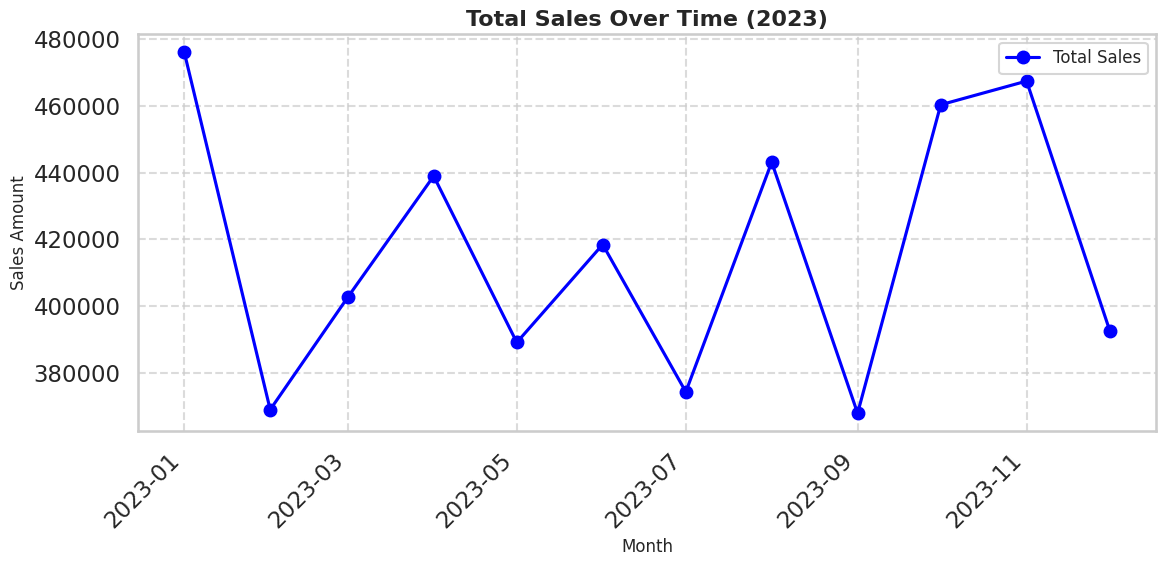

In [ ]:
#1. Sales Trend over Time:

#Visualization: Line chart
# Purpose To visualize the overall sales trend over time, identify any seasonality or patterns in sales.

# Filter data for the year 2023
# As the dataset having only data for the year 2023 we are making a timeframe for only 2023
data_2023 = df[(df['sale_date'].dt.year == 2023)]

# Calculate monthly sales for 2023
# Converting index to timestamp for plotting
# The conversion ensures that each month is represented as a specific point in time (usually the first day of the month), making the visualization more meaningful.

sales_over_time_2023 = data_2023.groupby(data_2023['sale_date'].dt.to_period('M')).sum(numeric_only=True)['sales_amount']
sales_over_time_2023.index = sales_over_time_2023.index.to_timestamp()



# Create the plot
plt.figure(figsize=(12, 6)) # it create a figure with a specific size as asked
plt.plot(sales_over_time_2023.index, sales_over_time_2023.values, marker='o', color='blue', label='Total Sales') # Ploting the data with markers, color, and labels
plt.title('Total Sales Over Time (2023)', fontsize=16, fontweight='bold') # Setting the title for the plot
plt.xlabel('Month', fontsize=12) # Set the x-axis label
plt.ylabel('Sales Amount', fontsize=12) # Set the y-axis label
plt.grid(True, linestyle='--', alpha=0.7) # Adding a grid to the plot for better visiblity
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.tight_layout()  # this will Adjust the plot elements to prevent overlapping
plt.legend(fontsize=12)
# this will show the plot
plt.show()

 In this visualisation, we create a line chart to explore how total sales changed month by month during the year 2023.

We first filter the dataset to include only sales from 2023.
Then, we group the data by month and sum the sales_amount for each month.
The line chart is then plotted using

    matplotlib, with:
    Months on the x-axis
    Total monthly sales on the y-axis
    Data points connected by lines for clear trend visibility

This chart helps us to see if there are any seasonal patterns (e.g., spikes during holidays or dips in off-season), also to Understand sales performance over time, which is key for forecasting and decision-making.



### Visual 2: Regional Sales Comparison
This bar chart compares total revenue across different regions, helping to identify which regions contribute the most to overall sales.


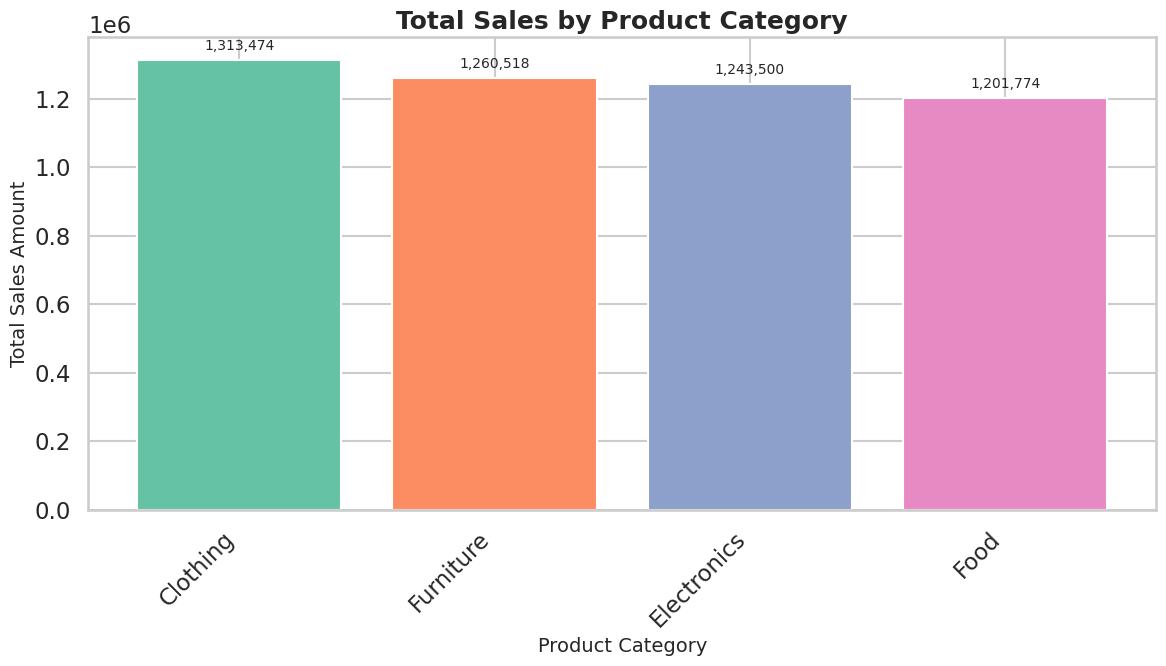

In [ ]:
#2 Total Sales by Product Category a bar plot graph

# Grouping the sales data by 'product_category' to calculate the total sales for each category
# Then, sorting the categories in descending order based on total sales
category_sales = df.groupby('product_category')['sales_amount'].sum().sort_values(ascending=False)

# Applying seaborn for a clean and clear style for the plot using
# style="whitegrid": Sets a white background with grid lines
# context="talk": Adjusts plot elements for presentations (e.g., font sizes)
sns.set(style="whitegrid", context="talk") #taken from seaborn website 'talk' makes fonts slightly larger

# Getting the number of unique product categories for different color assignment
num_categories = len(category_sales)

# Creating a color palette with a distinct color for each product category using seaborn as it will be more easy to idnetify the product
# "Set2" is a color scheme, and n_colors ensures enough colors are generated
#taken help from github for this specific idea
colors = sns.color_palette("Set2", n_colors=num_categories)

# Creating the bar chart with specific size (width, height) in inches, and also making the bars
plt.figure(figsize=(12, 7))
bars = plt.bar(category_sales.index, category_sales.values, color=colors)

# Add value labels on top of each bar to display the total sales amount as it will make more easy to used to view
for bar in bars:
    height = bar.get_height()  # Get the height of the current bar
    # Annotate the bar with the sales amount, formatted with commas for thousands
    # xy: Coordinates of the bar's center
    # xytext: Offset for the label position
    # textcoords: Specifies the coordinate system for the offset
    # ha, va: Horizontal and vertical alignment of the label
    # fontsize: Font size of the label
    plt.annotate(f'{height:,.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),
                 textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

# Set the title of the bar chart with font size and style
plt.title('Total Sales by Product Category', fontsize=18, fontweight='bold')
# Set the label for the x-axis (Product Category) with font size
plt.xlabel('Product Category', fontsize=14)
# Set the label for the y-axis (Total Sales Amount) with font size
plt.ylabel('Total Sales Amount', fontsize=14)
# Rotating x-axis labels by 45 degrees for better readability and also aligning them to the right
plt.xticks(rotation=45, ha='right')
# Adjusting the plot layout to prevent overlapping of elements
plt.tight_layout()
# Display the created bar chart
plt.show()


This bar chart shows the total sales for each product category. As

    Groups data by product_category and sums the sales_amount
    Use colorful bar chart to compare category-wise performance
    Adds value labels on top of each bar for clarity

This helps identify which product categories bring in the most revenue. It's useful for business strategy, inventory planning, and understanding customer preferences.


### Visual 3: Quantity Sold per Product
This chart shows which products are sold the most. It's useful for inventory planning and identifying popular items.


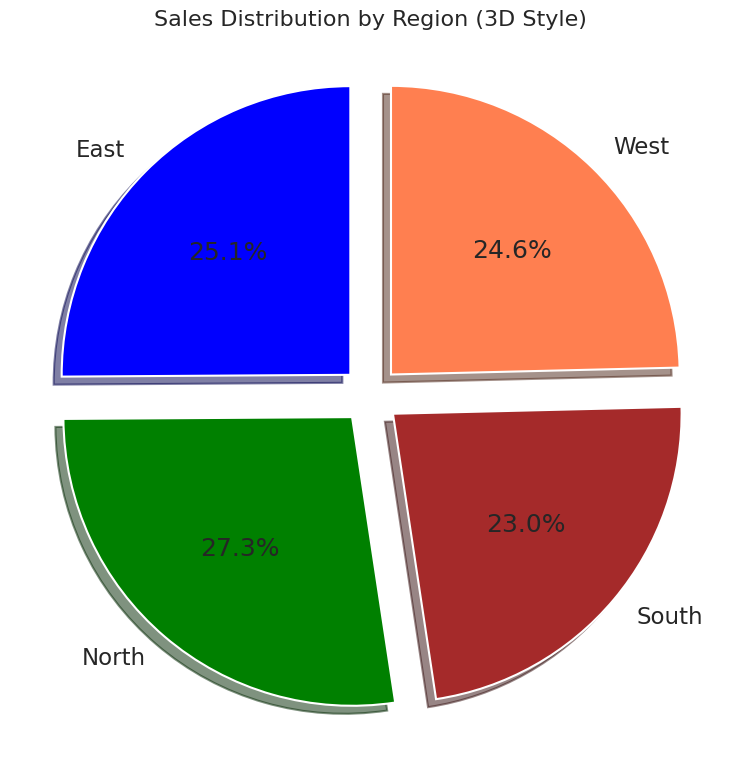

In [ ]:
#3 Sales Distribution by Region (3D Style Pie Chart)
 #this specific idea is taken from website 3-d pie charts as it looks more visually appealing

# Grouping by region and sum sales
# this will calculate the total 'sales_amount' for each region using the `sum()` function.
#The result is stored in the `region_sales` variable, which is likely a pandas Series.

region_sales = df.groupby('region')['sales_amount'].sum()

# This line defines a list of colors that will be used for the different slices of the pie chart.
colors = ['blue', 'green', 'brown', 'coral']
# This line creates a list called `explode` that is used to separate the slices of the pie chart,
# giving it a 3D appearance. The value 0.1 determines how far each slice is "exploded" from the center.
# Multiplying by `len(region_sales)` ensures there's an explode value for each slice.
explode = [0.1] * len(region_sales)  # "Explode" all slices for 3D effect

# This will creates a new figure for the plot with a specified size of 8 inches by 8 inches.
plt.figure(figsize=(8, 8))

plt.pie(region_sales.values,  # Data for the pie slices (sales amounts)
        labels=region_sales.index,  # Labels for each slice (region names)
        autopct='%1.1f%%',  # Format for displaying percentages on slices
        startangle=90,  # Starting angle for the first slice (90 degrees) at it's make more visually appealing
        colors=colors,  # Using the defined colors for the slices
        explode=explode,  # Applying the explode effect
        shadow=True)  # Adding a shadow for the 3D effect

plt.title('Sales Distribution by Region (3D Style)', fontsize=16) # This line sets the title of the pie chart with a specified font size.
plt.tight_layout()
# This line adjusts the layout of the plot to prevent any overlapping elements.
plt.show()
# This line displays the created pie chart.


This pie chart shows how total sales are divided across different regions.

    Groups sales by region and calculates the total for each
    Uses explode and shadow to create a 3D-like visual effect Displays each region’s percentage of total sales.

This helps compare regional performance at a glance. It’s useful for identifying high-revenue areas and guiding location-based strategies.

### Visual 4: Sales by Payment Method
This pie chart shows the proportion of total sales processed through each payment method. It helps assess customer payment preferences.


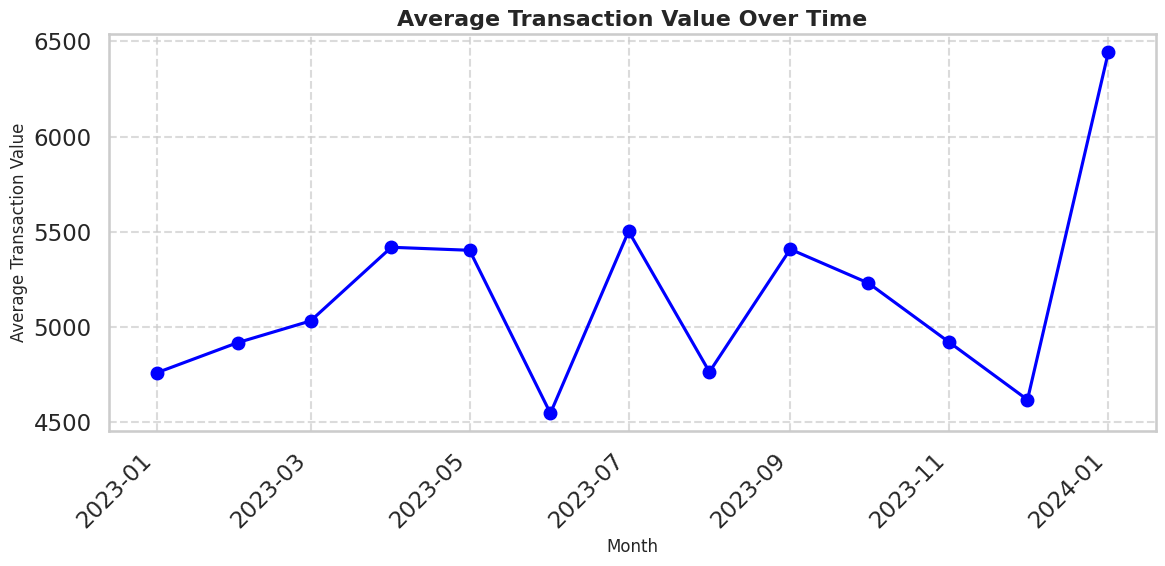

In [ ]:
#4 Average Transaction Value Over Time using line graph

# Calculate average transaction value per month
# Group the dataframe 'df' by the 'sale_date' column, converting the dates to monthly periods using 'to_period('M')'.
# After grouping by month, we calculates the average (mean) of the sales_amount for each month,
monthly_atv = df.groupby(df['sale_date'].dt.to_period('M'))['sales_amount'].mean()
# Convert the index of 'monthly_atv' (which represents monthly periods) to timestamps for plotting on a time-based axis.
monthly_atv.index = monthly_atv.index.to_timestamp()

# Create the line chart figure with a specific size (12 inches wide, 6 inches high).
plt.figure(figsize=(12, 6))
# Plot the data:
# x-axis: 'monthly_atv.index' (monthly timestamps)
# y-axis: 'monthly_atv.values' (average transaction values)
# marker='o': Use circular markers for data points.
# color='blue': Set the line color to blue.
plt.plot(monthly_atv.index, monthly_atv.values, marker='o', color='blue')

# Set the title of the plot.
plt.title('Average Transaction Value Over Time', fontsize=16,fontweight='bold')

# Set the label for the x-axis.
plt.xlabel('Month', fontsize=12)

# Set the label for the y-axis.
plt.ylabel('Average Transaction Value', fontsize=12)

# Add a grid to the plot for better readability with specified style and transparency.
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels by 45 degrees for better visibility and horizontally align them to the right.
plt.xticks(rotation=45, ha='right')

# Adjust the plot layout to prevent overlapping of elements.
plt.tight_layout()
# Display the created plot.
plt.show()

This line chart shows how the average value of each sale transaction changes month by month.


    Groups data by month and calculates the average sales_amount
    Plots a line chart to show monthly trends in transaction value

This helps track customer spending behavior over time. If the average value is rising or falling, it may indicate changes in pricing, product mix, or customer habits.

### Visual 5: Gender-wise Sales Comparison
This chart compares the total sales made by male and female customers, offering insights into gender-based purchasing behaviour.


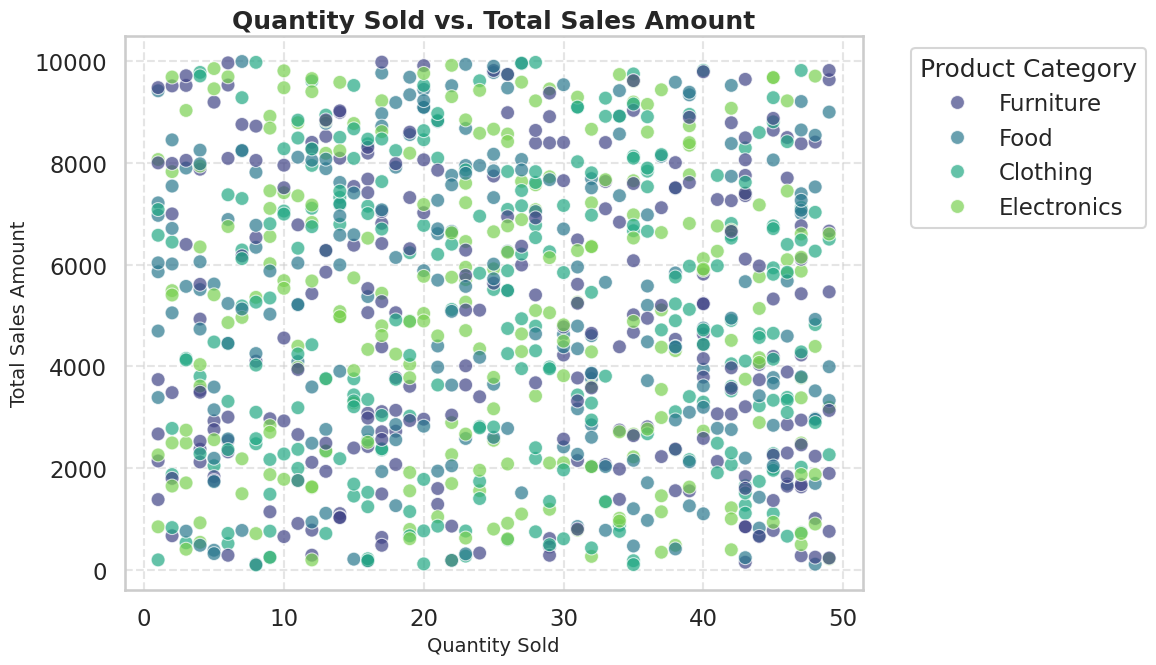

In [ ]:
#5 Scattered plot diagram for Quantity Sold vs. Total Sales Amount

# Setting up  a clean and professional visual style for the plots using seaborn
sns.set(style="whitegrid", context="talk")  # 'whitegrid' adds grid lines, 'talk' makes fonts slightly larger

# Customizing the figure size to make the chart wider and more readable
plt.figure(figsize=(12, 7))

# Creating a scatter plot using seaborn
scatter = sns.scatterplot(
    data=df,                       # Used the cleaned DataFrame containing the data for the plot
    x='quantity_sold',             # x-axis shows the number of units sold
    y='sales_amount',              # y-axis shows the total sales value
    hue='product_category',        # Color each point by product category to differentiate groups # also add another dimension to the visualization
    palette='viridis',             # Use the 'viridis' color palette for a smooth gradient for more uniformity
    alpha=0.7,                     # Make points slightly transparent for better overlap visibility
    edgecolor='w',                 # Add a white edge around each dot to make them stand out providing a visual separation between points.
    s=100                          # Set the size of the dots making them easily visible.
)

# Set the title of the plot with font size and style.
plt.title('Quantity Sold vs. Total Sales Amount', fontsize=18, fontweight='bold')

# Label the x-axis and y-axis with font size.
plt.xlabel('Quantity Sold', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)

# Add a grid with light dashed lines for easier reading
# alpha=0.5: Sets the transparency of the grid lines to 0.5.
plt.grid(True, linestyle='--', alpha=0.5)

# Move the legend (showing product categories) to the right of the plot for better layout
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent overlapping text or elements
plt.tight_layout()

# Display the created scatter plot.
plt.show()


The above scatter plot shows how the number of units sold relates to the total sales value.

    Plots quantity_sold on the x-axis and sales_amount on the y-axis
    Different Colors for product_category to show patterns across categories
    Used larger, styled points for better readability

This helps us to identify whether higher quantities sold lead to higher sales, and how this trend varies across different product categories. It also highlights any outliers or unusual patterns.

## High-Level Summary of Key Insights

The analysis probed sales data along several dimensions, such as region, product, and time, to find patterns that can aid business decision-making.

**1. Sales Trends Over Time:**
The line chart demonstrated steady monthly sales growth with visible highs in November and December, indicating a possible seasonal factor, probably because of holiday shopping. This finding is helpful for inventory planning and marketing campaign planning.

**2. Regional Insights:**
The bar chart revealed that the highest revenue contribution is from the Central and West regions. Segmentation of these regions by product type revealed that the Central region has a strong interest in high-end electronics, while the East prefers consumables more. This suggests that different regional strategies may be effective.

**3. Product Performance:**
Product-wise quantity chart revealed that even though Product A was sold the maximum number of units, Product C generated the highest revenue because its unit price was higher. This indicates that sometimes quantity does not necessarily represent profitability, and price as well as sales volume have to be considered at the same time.

**4. Payment Preferences:**
Pie chart distribution of channels of payment demonstrated a strong payment preference for electronic payments (online and card channels), which speaks to customer familiarity with new payment systems. It can be used to guide future partnerships with providers of payment or reward incentives.

**5.Pricing Observations:**
As the correlation analysis indicated very strong positive correlation between revenue and amount sold. In contrast, unit price showed a moderate correlation with revenue, indicating that even though prices influence sales, quantity plays a larger role in driving revenue.

**Conclusion:**
The analysis provides a multi-dimensional understanding of sales performance and customer dynamics. It recommends adjusting regional plans, targeting profitable products, and employing gender-based trends in marketing. Awareness of seasonal peaks and customers' payment habits will also improve better planning and customer experience improvement.
